In [15]:
import os
import pandas as pd
from astropy import table
import matplotlib.pyplot as plt

In [16]:
dirCat=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\catalogs\forPaper\v06'
dirCatCleaned=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex018\datasets'
fileNameCOSMOS2015=r'01_COSMOS2015_allBands.fits'
fileNameTrain=r'05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo.csv'
fileNameTest=r'05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv'
fileNameRun=r'04_COSMOS2015_run_WorkBands_SOMinfo.csv'

In [17]:
train=pd.read_csv(os.path.join(dirCatCleaned,fileNameTrain))
test=pd.read_csv(os.path.join(dirCatCleaned,fileNameTest))
tabCOSMOS2015=table.Table.read(os.path.join(dirCat,fileNameCOSMOS2015),format='fits')
tabCOSMOS2015=tabCOSMOS2015.to_pandas()

In [18]:
# Limit narrow-band errors
data=tabCOSMOS2015
errCols=list(c for c in data.columns if ('ap3' in c and ('IA' in c or 'IB' in c or 'NB' in c) and 'e_' in c))
for c in errCols:
    data=data[data[c]>=0]
    data=data[data[c]<1]

In [19]:
# Leave only the narrow bands + Seq column for merging
NbCols=['Seq']+list(c for c in data.columns if ('ap3' in c and ('IA' in c or 'IB' in c or 'NB' in c) and 'e_' not in c))
data=data[NbCols]

In [20]:
KB=train.append(test,ignore_index=True,sort=False)
KB.drop('IB574ap3',inplace=True,axis=1)
KB.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'photoZ_SED', 'specZ', 'Instr', 'Q_f', 'sc_Ksmagap3',
       'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3', 'sc_Vmagap3',
       'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3', 'photoZ_ML',
       'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3', 'w_sc_Ymagap3',
       'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3', 'w_sc_Vmagap3',
       'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3', 'w_sc_zppmagap3',
       'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM', 'cellID_RunBigSOM',
       'specZ_outlCoeff', 'photoZ_ML_outlCoeff', 'photoZ_SED_outlCoeff',
       'quantErr_outlCoeff', 'trainMapOccupation'],
      dtype='object')

In [21]:
# Remove objects with photoZ_SED>1.2
KB=KB[KB['photoZ_SED']<1.2]
# Merge old photometry with narrow band photometry
KB=KB.merge(data,how='inner',left_on='Seq',right_on='Seq')
# Remove objects with photoZ_SED_outlCoeff>1, trainMapOccupation<5
KBclean=KB[KB['trainMapOccupation']>5]
KBcleanSED=KBclean[KBclean['photoZ_SED_outlCoeff'].abs()<1]
KBcleanSpec=KBclean[KBclean['specZ_outlCoeff'].abs()<1]

In [23]:
KBcleanSpec.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'photoZ_SED', 'specZ', 'Instr', 'Q_f', 'sc_Ksmagap3',
       'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3', 'sc_Vmagap3',
       'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3', 'photoZ_ML',
       'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3', 'w_sc_Ymagap3',
       'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3', 'w_sc_Vmagap3',
       'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3', 'w_sc_zppmagap3',
       'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM', 'cellID_RunBigSOM',
       'specZ_outlCoeff', 'photoZ_ML_outlCoeff', 'photoZ_SED_outlCoeff',
       'quantErr_outlCoeff', 'trainMapOccupation', 'IA484ap3', 'IA527ap3',
       'IA624ap3', 'IA679ap3', 'IA738ap3', 'IA767ap3', 'IB427ap3', 'IB464ap3',
       'IB505ap3', 'IB574ap3', 'IB709ap3', 'IB827ap3', 'NB711ap3', 'NB816ap3'],
      dtype='object

In [24]:
print('No clean: ',len(KB))
print('Occupation: ',len(KBclean))
print('SED clean: ',len(KBcleanSED))
print('SpecZ clean: ',len(KBcleanSpec))

No clean:  19231
Occupation:  16977
SED clean:  12252
SpecZ clean:  12725


(array([0.0802967 , 0.50942334, 0.48967825, 0.84377355, 0.86088596,
        1.91659015, 1.66253665, 0.87141668, 1.18207277, 0.90037614,
        1.23604269, 1.68886344, 0.95697874, 0.94776436, 0.942499  ,
        0.87931471, 0.40016718, 0.12900126, 0.1303176 , 0.12241956]),
 array([0.005 , 0.0647, 0.1244, 0.1841, 0.2438, 0.3035, 0.3632, 0.4229,
        0.4826, 0.5423, 0.602 , 0.6617, 0.7214, 0.7811, 0.8408, 0.9005,
        0.9602, 1.0199, 1.0796, 1.1393, 1.199 ]),
 <a list of 20 Patch objects>)

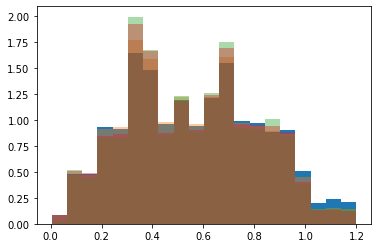

In [25]:
plt.hist(KB['photoZ_SED'],bins=20,density=True)
plt.hist(KBclean['photoZ_SED'],bins=20,density=True,alpha=0.4)
plt.hist(KBcleanSED['photoZ_SED'],bins=20,density=True,alpha=0.4)
plt.hist(KBcleanSpec['photoZ_SED'],bins=20,density=True,alpha=0.4)

In [28]:
# Prepare datasets of small size for honest comparison
catPrefix='06_CleanCompare_'
prefixes=['noClean_','OccupMap_','SEDoutl_','SpecZoutl_']
datasets=[KB,KBclean,KBcleanSED,KBcleanSpec]
size=12252
for p,k in zip(prefixes,datasets):
    d=k.sample(size)
    d.to_csv(os.path.join(dirCat,
                               catPrefix+p+str(size)+'.csv'), index=False)

In [29]:
KB.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'photoZ_SED', 'specZ', 'Instr', 'Q_f', 'sc_Ksmagap3',
       'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3', 'sc_Vmagap3',
       'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3', 'photoZ_ML',
       'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3', 'w_sc_Ymagap3',
       'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3', 'w_sc_Vmagap3',
       'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3', 'w_sc_zppmagap3',
       'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM', 'cellID_RunBigSOM',
       'specZ_outlCoeff', 'photoZ_ML_outlCoeff', 'photoZ_SED_outlCoeff',
       'quantErr_outlCoeff', 'trainMapOccupation', 'IA484ap3', 'IA527ap3',
       'IA624ap3', 'IA679ap3', 'IA738ap3', 'IA767ap3', 'IB427ap3', 'IB464ap3',
       'IB505ap3', 'IB574ap3', 'IB709ap3', 'IB827ap3', 'NB711ap3', 'NB816ap3'],
      dtype='object

In [33]:
KBcleanSpec['photoZ_SED_outlCoeff'].max()

26.108371593407146